In [2]:
%pylab --no-import-all inline
import tensorflow as tf

import sklearn.cross_validation

from utils import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
mnist = load_datasets()

Input: $X$

Output: $y2$

$y_1 = \mathrm{sigmoid} (X w_{01} + b_1)$

$y_2 = \mathrm{softmax} (y_1 w_{12} + b_2)$

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

w01 = tf.Variable(tf.random_uniform([784, 50], -0.01, 0.01))
b1 = tf.Variable(tf.random_uniform([50], -0.01, 0.01))
w12 = tf.Variable(tf.random_uniform([50, 10], -0.01, 0.01))
b2 = tf.Variable(tf.random_uniform([10], -0.01, 0.01))

y1 = tf.nn.sigmoid(tf.matmul(X, w01) + b1)
y2 = tf.nn.softmax(tf.matmul(y1, w12) + b2)

cross_entropy = - tf.reduce_mean(y_true * tf.log(y2))
quality = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_true, 1), tf.argmax(y2, 1)), tf.float32))

train_operation = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [7]:
sess = tf.InteractiveSession()

In [8]:
tf.initialize_all_variables().run()

q = []

In [9]:
for j in xrange(400):
    for _, indices in sklearn.cross_validation.KFold(60000, 60000/200, shuffle=True):
        train_operation.run({
            X: mnist.original.train[indices],
            y_true: one_hot(mnist.labels.train[indices]),
        })
    q.append(1 - quality.eval({
        X: mnist.original.test,
        y_true: one_hot(mnist.labels.test),
    }))
    if j % 10 == 0:
        print "%d: %.2f%%" % (j, q[-1] * 100)

0: 88.65%
10: 53.18%
20: 21.89%
30: 15.17%
40: 12.21%
50: 10.83%
60: 9.97%
70: 9.32%
80: 8.96%
90: 8.79%
100: 8.36%
110: 8.13%
120: 7.96%
130: 7.73%
140: 7.61%
150: 7.38%
160: 7.16%
170: 6.95%
180: 6.81%
190: 6.71%
200: 6.55%
210: 6.45%
220: 6.26%
230: 6.10%
240: 6.03%
250: 5.93%
260: 5.82%
270: 5.75%
280: 5.74%
290: 5.59%
300: 5.53%
310: 5.45%
320: 5.38%
330: 5.24%
340: 5.23%
350: 5.16%
360: 5.13%
370: 5.11%
380: 5.07%
390: 4.96%


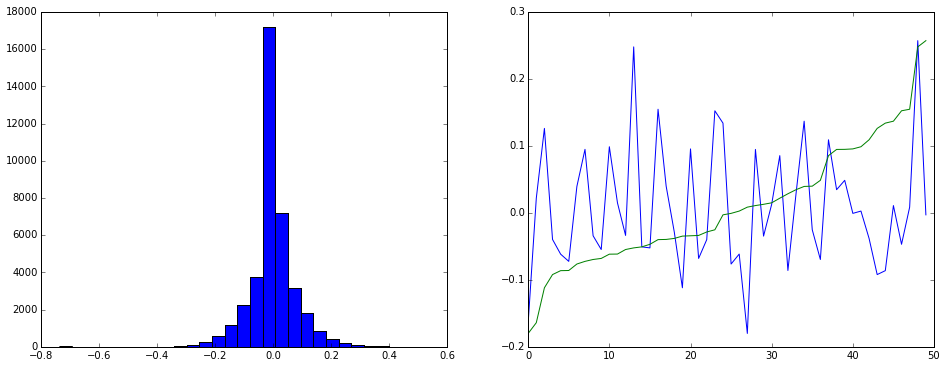

In [10]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(w01.eval().ravel(), bins=30);
plt.subplot(1, 2, 2)
plt.plot(b1.eval());
plt.plot(sorted(b1.eval()));

4.93%


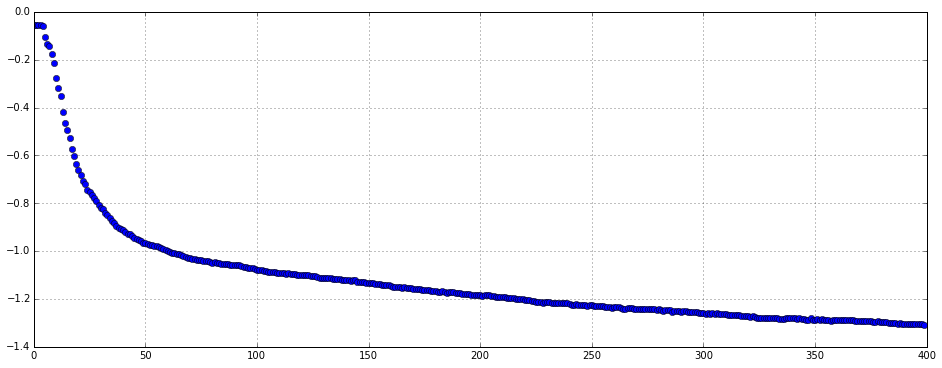

In [11]:
plt.figure(figsize=(16, 6))
plt.plot(np.log10(q), 'o')
plt.grid()
print "%.2f%%" % (q[-1] * 100)

In [17]:
for label in ['original', 'dirty_light', 'dirty_hard']:
    _q = (1 - quality.eval({
        X: mnist[label].test,
        y_true: one_hot(mnist.labels.test),
    }))
    print _q

0.0493000149727
0.575199991465
0.634099990129


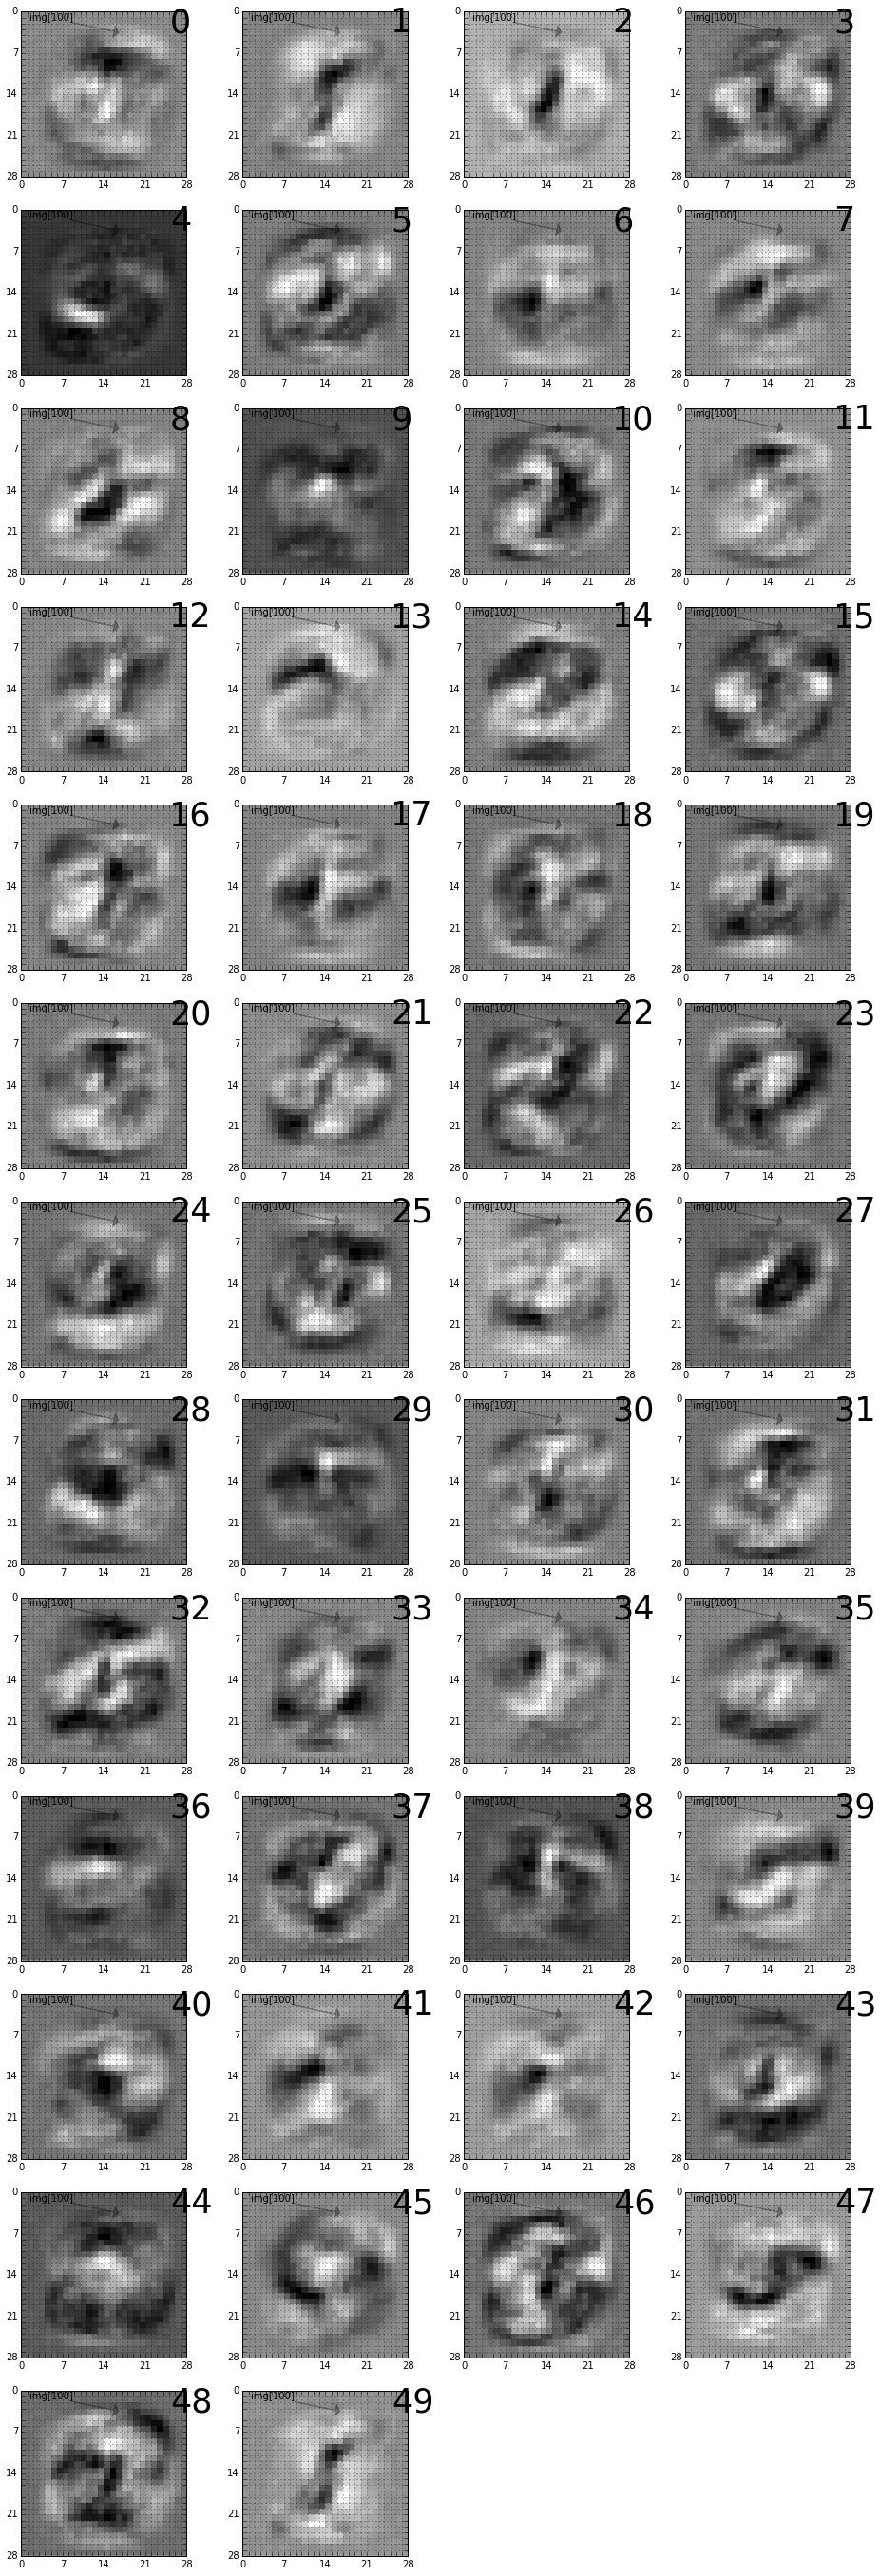

In [29]:
plt.figure(figsize=(16, 48))
for j in xrange(50):
    plt.subplot(13, 4, j + 1)
    imgshow(w01.eval()[:, j], j)

In [79]:
def plot_loss_map(y_tensor):
    y_get = np.argmax(y_tensor.eval({
        X: mnist.original.test,
        y_true: one_hot(mnist.labels.test),
    }), 1)
    y_real = mnist.labels.test

    map_ = np.zeros((10, 10), np.int32)
    for pair in zip(y_real, y_get):
        map_[pair] += 1

    for j in xrange(10):
        map_[j, j] = 0

    plt.pcolormesh(_map)
    plt.colorbar()
    plt.xlabel('real, expected')
    plt.ylabel('got')
    plt.title('Loss map')
    plt.xticks(np.arange(10)+0.5, np.arange(10))
    plt.yticks(np.arange(10)+0.5, np.arange(10))

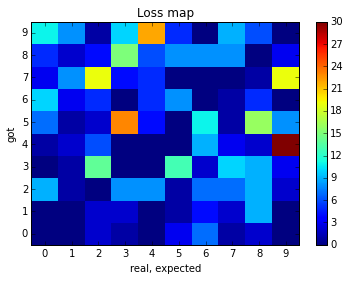

In [80]:
plot_loss_map(y2)